In [213]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
import matplotlib.gridspec as gridspec
import matplotlib.colors as mcolors
from matplotlib.colorbar import Colorbar
from matplotlib import colors
from scipy import special
from mycolorpy import colorlist as mcp
from pathlib import Path



params = {'font.family' : 'lmodern'}
plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.preamble'] = r"\usepackage{amsmath}"
plt.rcParams.update(params)

In [214]:
cwd = Path().resolve()
project_root = cwd.parent

data_equilibrium_dir = project_root / "data" / "equilibrium"
data_quench_dir = project_root / "data" / "quench"
plot_dir = project_root / "plot"

In [215]:
def comparison_data_entropy_at_equilibrium_with_various_coeff():
    Entr1 = np.loadtxt(data_equilibrium_dir/"entropy_10_cells_thermodynamic.txt")
    Entr2 = np.loadtxt(data_equilibrium_dir/"entropy_10_cells_thermodynamic_k08.txt")
    Entr3 = np.loadtxt(data_equilibrium_dir/"entropy_10_cells_thermodynamic_k09.txt")
    Entr4 = np.loadtxt(data_equilibrium_dir/"entropy_10_cells_thermodynamic_k095.txt")
    xvals = np.arange(2, 22, 2)

    fig, ax1 = plt.subplots(figsize=(8, 6))
    ax1.set_title(r"Entropy vs $N_A$ at equilibrium in the thermodynamic limit", fontsize=20)

    ax1.scatter(xvals, Entr1, color="red", marker='o', label=r"$w/v = 0.70$")
    ax1.scatter(xvals, Entr2, color="orange", marker='o', label=r"$w/v = 0.8$")
    ax1.scatter(xvals, Entr3, color="green", marker='o', label=r"$w/v = 0.9$")
    ax1.scatter(xvals, Entr4, color="blue", marker='o', label=r"$w/v = 0.95$")
    ax1.set_xlabel(r"$N_A$", fontsize=15, color="black")
    ax1.set_ylabel(r"$S$", fontsize=15, color="black")

    ax1.tick_params(direction="in", labelsize=15)

    ax1.legend(loc='best', fontsize=10)

    plt.show()

    fig.savefig(plot_dir/"entropy_vs_NA_equilibrium_thermodynamic_limit.pdf", bbox_inches='tight')

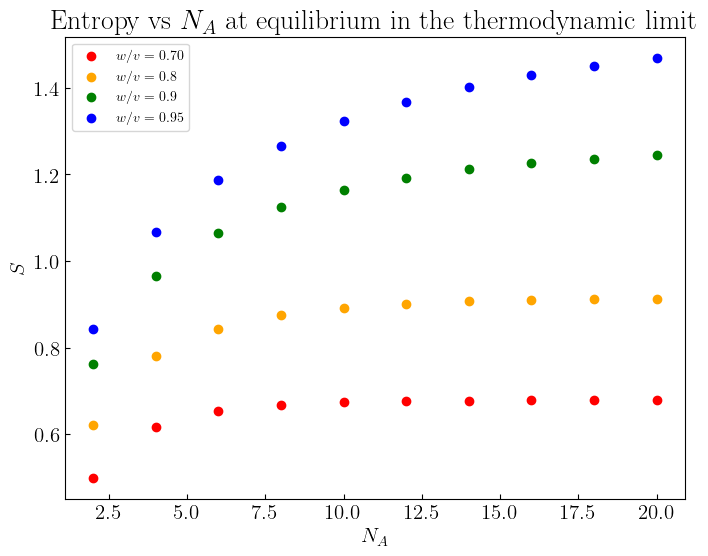

In [216]:
comparison_data_entropy_at_equilibrium_with_various_coeff()

In [217]:
def comparison_data_entropy_vs_var_equilibrium_thermo():
    Entr1 = np.loadtxt(data_equilibrium_dir/"entropy_10_cells_thermodynamic.txt")
    Var = np.loadtxt(data_equilibrium_dir/"variance_10_cells_thermodynamic.txt")
    xvals = np.arange(2, 22, 2)

    fig, ax1 = plt.subplots(figsize=(8, 6), dpi=100)
    ax2 = ax1.twinx()
    ax1.set_title(r"$S$ vs $\Delta N_{A}$ at equilibrium in the thermodynamic limit", fontsize=20)
    
    ax1.scatter(xvals, Entr1, color="red", marker='o')
    ax2.scatter(xvals, Var, color="blue", marker='o')


    ax1.set_ylabel(r"$S$", fontsize=20, color="black")
    ax2.set_ylabel(r"$\Delta N_{A}$", fontsize=20, color="blue")
    ax1.set_xlabel(r"$N_{A}$", fontsize=20)

    ax1.tick_params(direction="in", labelsize=15)
    ax2.tick_params(direction="in", labelsize=15)

    # Better manual layout control
    plt.subplots_adjust(left=0.15, right=0.85, top=0.95, bottom=0.15)

    plt.show()
    fig.savefig(plot_dir/"entropy_vs_variance_equilibrium_thermolimit.pdf", bbox_inches = 'tight')


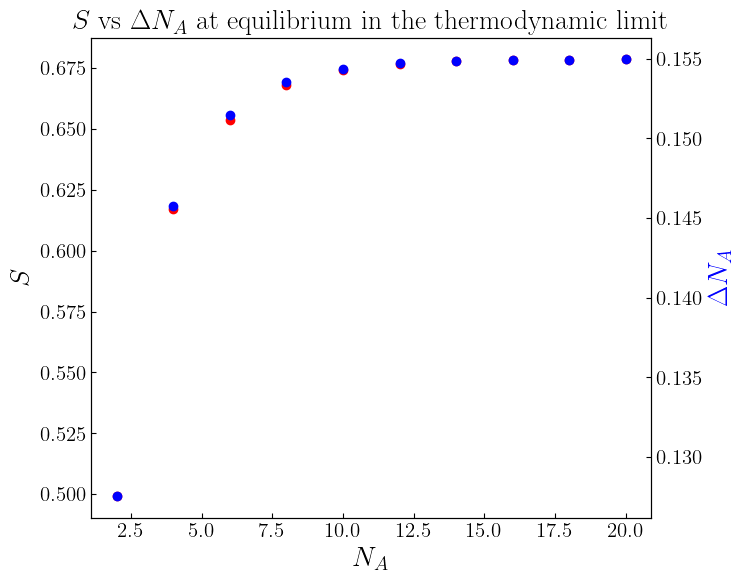

In [218]:
comparison_data_entropy_vs_var_equilibrium_thermo()

In [219]:
def comparison_entropy_thermo_equilibrium_one_cell_various_hop_coeff():
    w = np.linspace(0.400, 2.000, int(round((2.000 - 0.400)/0.01)) + 1)
    entropy = np.loadtxt(data_equilibrium_dir/"entropy_1_cell_thermodynamic_comparison_hop_coeff.txt")

    fig, ax = plt.subplots(figsize=(8, 6), dpi=100)
    ax.plot(w, entropy, color='blue')
    ax.set_title(r"Entropy of one cell at equilibrium vs hop coefficient", fontsize=20)
    ax.set_xlabel(r"$w$", fontsize=20)
    ax.set_ylabel(r"$S$", fontsize=20)
    ax.tick_params(direction="in", labelsize=15)

    plt.show()
    fig.savefig(plot_dir/"entropy_vs_hop_coeff_equilibrium.pdf", bbox_inches='tight')

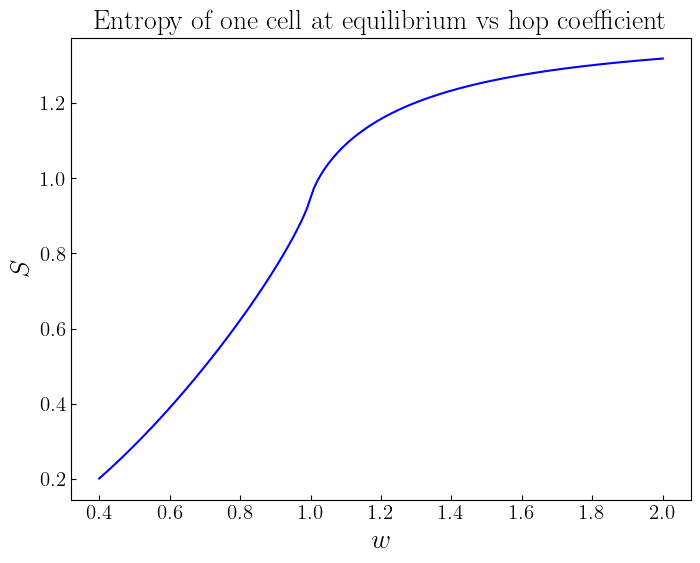

In [220]:
comparison_entropy_thermo_equilibrium_one_cell_various_hop_coeff()

In [221]:
def comparison_data_entropy_equilibrium_with_various_hop_coefficients():
    coeffs = [0.5, 0.6, 0.9, 0.95, 0.98]
    colors = ["red", "orange", "green", "blue", "purple"]

    xvals = np.arange(2, 202, 2)

    fig, ax1 = plt.subplots(figsize=(8, 6))
    ax1.set_title(r"Entropy vs $N_A$ at equilibrium with various hop coefficients", fontsize=20)

    for w, color in zip(coeffs, colors):
        data = np.loadtxt(data_equilibrium_dir / f"entropy_200_cells_noflux_k{w}.txt")
        ax1.scatter(xvals, data, color=color, marker="o", s=7, label=fr"$w/v = {w}$")

    ax1.set_xlabel(r"$N_A$", fontsize=15, color="black")
    ax1.set_ylabel(r"$S$", fontsize=15, color="black")
    ax1.tick_params(direction="in", labelsize=15)
    ax1.legend(loc="center", fontsize=12, bbox_to_anchor=(0.5, 0.35), ncol=3)

    plt.show()
    fig.savefig(plot_dir / "entropy_vs_NA_equilibrium_various_hop_coeff.pdf", bbox_inches="tight")

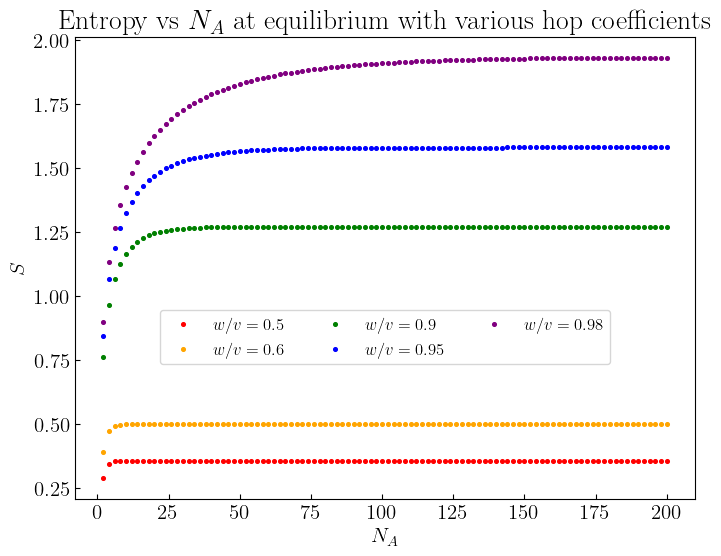

In [222]:
comparison_data_entropy_equilibrium_with_various_hop_coefficients()

In [223]:
def comparison_data_entropy_vs_var_equilibrium_finite():
    # Load data
    Entr = np.loadtxt(data_equilibrium_dir / "entropy_200_cells_noflux_k0.7.txt")
    Var = np.loadtxt(data_equilibrium_dir / "variance_200_cells_noflux_k0.7.txt")
    xvals = np.arange(2, 202, 2)

    # Figure and grid spec
    fig = plt.figure(figsize=(10, 15), dpi=100)
    spec = gridspec.GridSpec(ncols=1, nrows=2, hspace=0)

    # ---------- Top subplot ----------
    ax1 = fig.add_subplot(spec[0, 0])
    ax2 = ax1.twinx()  # Twin y-axis for variance

    # Plot data
    ax1.scatter(xvals, Entr, color="orange", s=10)
    ax2.scatter(xvals, Var, color="blue", s=10)

    # Labels and title
    ax1.set_title(r"$S$ vs $\Delta N_{A}$ at equilibrium in the finite system", fontsize=20)
    ax1.set_ylabel(r"$S$", fontsize=20, color="orange")
    ax2.set_ylabel(r"$\Delta N_{A}$", fontsize=20, color="blue")

    # Styling
    ax1.tick_params(direction="in", labelsize=15)
    ax2.tick_params(direction="in", labelsize=15)
    ax1.text(70, 0.530, r"$v_{i} = 1, w_{i} = 0.7, N = 400$", fontsize=15)

    # ---------- Shared x-axis inside top subplot ----------
    tick_pad = -15    # adjust tick label position inside plot
    label_coords = (1.05, 0.02)  # x-axis label position (right & slightly inside)
    ax1.xaxis.set_label_position('bottom')
    ax1.xaxis.set_ticks_position('bottom')
    ax1.set_xlabel(r"$N_A$", fontsize=20)
    ax1.xaxis.set_label_coords(*label_coords)
    ax1.tick_params(axis='x', which='both', direction='in', labelsize=15, pad=tick_pad)

    # ---------- Bottom subplot ----------
    ax3 = fig.add_subplot(spec[1, 0], sharex=ax1)
    ax3.plot(xvals, Entr / Var, color="green")
    ax3.set_ylabel(r"$S/\Delta N_{A}$", fontsize=20)
    # Remove x-axis ticks and labels
    ax3.tick_params(axis='x', which='both', bottom=False, labelbottom=False, direction="in", labelsize=15)

    # ---------- Layout ----------
    plt.subplots_adjust(left=0.15, right=0.85, top=0.95, bottom=0.15)

    # Show and save
    plt.show()
    fig.savefig(plot_dir / "entropy_vs_variance_equilibrium_discrete.pdf", bbox_inches='tight')


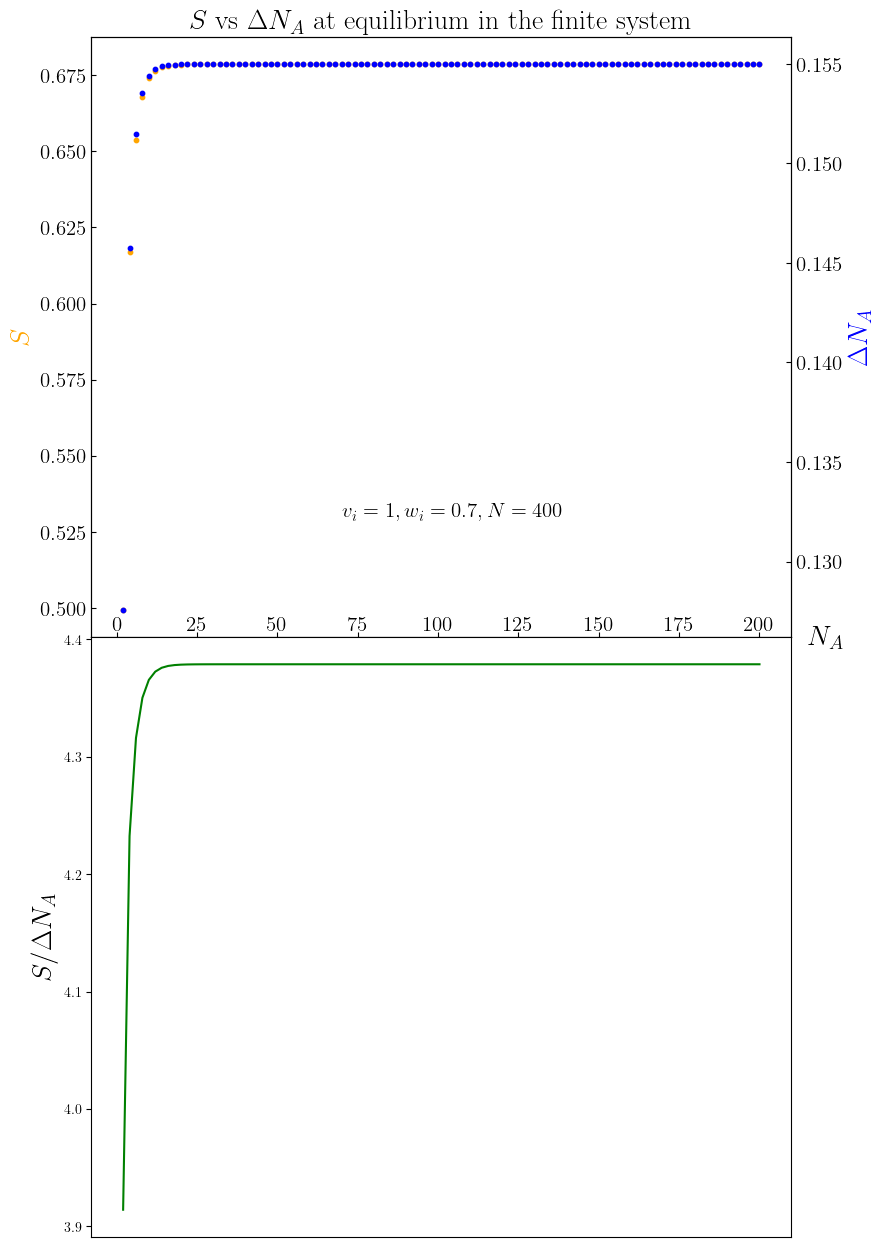

In [224]:
comparison_data_entropy_vs_var_equilibrium_finite()

In [250]:
def plot_entropy_variance_ratio_for_different_hop_coefficients():
    coeffs = [0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.96, 0.97, 0.98, 0.99]
    colors = ["red", "orange", "yellow", "green", "blue", "purple", "brown", "pink", "gray", "cyan"]
    xvals = np.arange(2, 202, 2)
    y_const = (np.pi**2)/3  # Constant line for comparison

    fig, ax = plt.subplots(figsize=(8, 6), dpi=100)
    ax.set_title(r"$S/\Delta N_{A}$ vs $N_A$ at equilibrium with various hop coefficients", fontsize=20)

    for w, color in zip(coeffs, colors):
        entropy = np.loadtxt(data_equilibrium_dir / f"entropy_200_cells_noflux_k{w}.txt")
        variance = np.loadtxt(data_equilibrium_dir / f"variance_200_cells_noflux_k{w}.txt")
        ratio = entropy / variance
        ax.plot(xvals, ratio, color=color, label=fr"$w/v = {w}$")
    ax.plot(xvals, np.full_like(xvals, y_const, dtype=float), ls="--", label=fr"$\pi^2/3 \approx {y_const:.2f}$")
    
    ax.set_xlabel(r"$N_A$", fontsize=15)
    ax.set_ylabel(r"$S/\Delta N_{A}$", fontsize=15)
    ax.tick_params(direction="in", labelsize=15)
    ax.legend(loc="center", fontsize=12, bbox_to_anchor=(1.15, 0.5), ncol=1)

    plt.show()
    fig.savefig(plot_dir / "entropy_variance_ratio_vs_NA_equilibrium_various_hop_coeff.pdf", bbox_inches="tight")

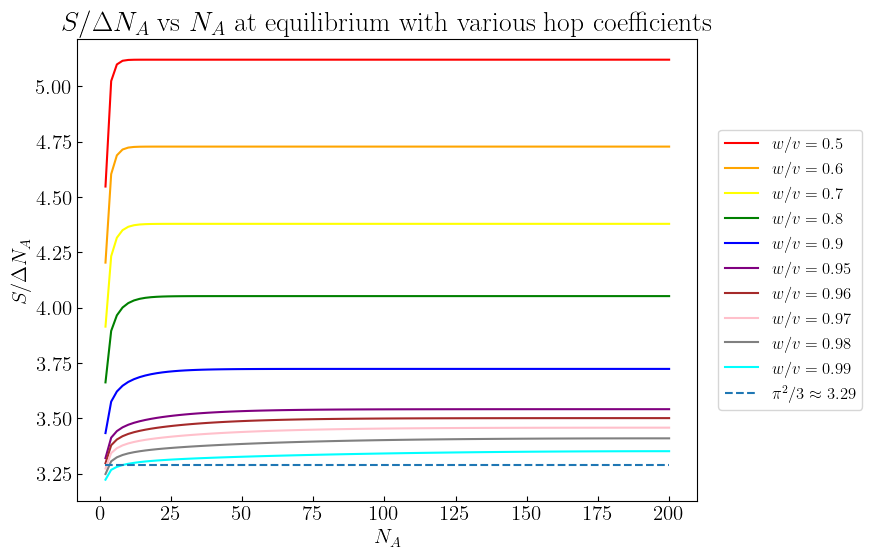

In [251]:
plot_entropy_variance_ratio_for_different_hop_coefficients()

In [227]:
def plot_correlation_data_as_distance_increase():
    coefficients = [0.5, 0.9, 0.99, 0.995, 0.998]
    colors = list(mcp.gen_color(cmap="viridis", n=len(coefficients)))

    fig, ax = plt.subplots(figsize=(8, 6), dpi=100)
    ax.set_title(r"$\langle c_{j,A}^\dagger c_{j',B} \rangle$ as a function of $l = j-j'$", fontsize=15)
    xvals = np.arange(0, 51, 1)

    for w, color in zip(coefficients, colors):
        correlation_list = np.loadtxt(data_equilibrium_dir / f"correlation_k={round(w,3)}_noflux.txt")
        ax.plot(xvals, correlation_list, color=color, lw=0.3, marker='o', markersize=3, label=fr"$w/v = {w}$")
    
    ax.legend(loc="upper right", fontsize=15)
    ax.set_xlabel(r"$l$", fontsize=15)
    ax.set_ylabel(r"$\langle c_{j,A}^\dagger c_{j',B} \rangle$", fontsize=15)
    ax.tick_params(direction="in", labelsize=15)
    ax.tick_params(direction="in", labelsize=15)

    # Better manual layout control
    plt.subplots_adjust(left=0.15, right=0.85, top=0.95, bottom=0.15)

    plt.show()
    fig.savefig(plot_dir/"correlation_vs_distance.pdf", bbox_inches = 'tight')

In [245]:
def plot_correlation_data_as_distance_increase_semilogy():

    xvals = np.arange(0, 51, 1)
    fig, ax = plt.subplots(figsize=(8, 6), dpi=100)
    ax.set_title(r"$\langle c_{j,A}^\dagger c_{j',B} \rangle$ as a function of $l = j-j'$", fontsize=15)
    coefficients = [0.5, 0.9, 0.99, 0.995, 0.998]
    colors = list(mcp.gen_color(cmap="viridis", n=len(coefficients)))

    for w, color in zip(coefficients, colors):
        correlation_list = np.loadtxt(data_equilibrium_dir / f"correlation_k={round(w,3)}_noflux.txt")
        ax.semilogy(xvals, correlation_list, color=color, lw=0.3, marker='o', markersize=3, label=fr"$w/v = {w}$")
    
    
    ax.legend(loc="best", fontsize=15)
    ax.set_xlabel(r"$l$", fontsize=15)
    ax.set_ylabel(r"$\langle c_{j,A}^\dagger c_{j',B} \rangle$", fontsize=15)
    ax.tick_params(direction="in", labelsize=15)

    # Better manual layout control
    plt.subplots_adjust(left=0.15, right=0.85, top=0.95, bottom=0.15)

    plt.show()
    fig.savefig(plot_dir/"correlation_vs_distance_semilogy.pdf", bbox_inches = 'tight')

In [246]:
def plot_correlation_data_as_distance_increase_loglogy():

    xvals = np.arange(0, 51, 1)
    fig, ax = plt.subplots(figsize=(8, 6), dpi=100)
    ax.set_title(r"$\langle c_{j,A}^\dagger c_{j',B} \rangle$ as a function of $l = j-j'$", fontsize=15)
    coefficients = [0.5, 0.9, 0.99, 0.995, 0.998]
    colors = list(mcp.gen_color(cmap="viridis", n=len(coefficients)))

    for w, color in zip(coefficients, colors):
        correlation_list = np.loadtxt(data_equilibrium_dir / f"correlation_k={round(w,3)}_noflux.txt")
        ax.loglog(xvals, correlation_list, color=color, lw=0.3, marker='o', markersize=3, label=fr"$w/v = {w}$")
    
    
    ax.legend(loc="best", fontsize=15)
    ax.set_xlabel(r"$l$", fontsize=15)
    ax.set_ylabel(r"$\langle c_{j,A}^\dagger c_{j',B} \rangle$", fontsize=15)
    ax.tick_params(direction="in", labelsize=15)

    # Better manual layout control
    plt.subplots_adjust(left=0.15, right=0.85, top=0.95, bottom=0.15)

    plt.show()
    fig.savefig(plot_dir/"correlation_vs_distance_loglog.pdf", bbox_inches = 'tight')

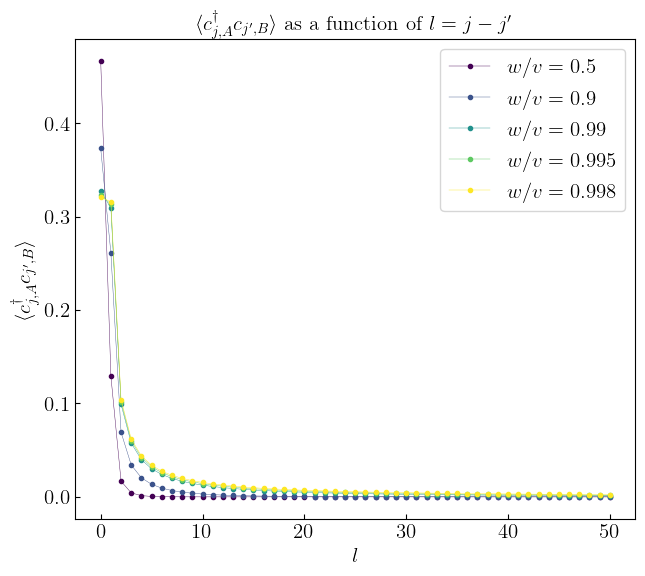

In [247]:
plot_correlation_data_as_distance_increase()

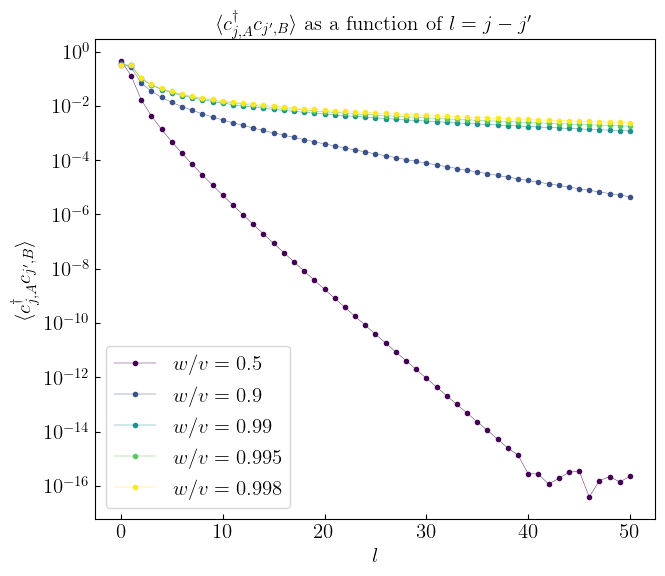

In [248]:
plot_correlation_data_as_distance_increase_semilogy()

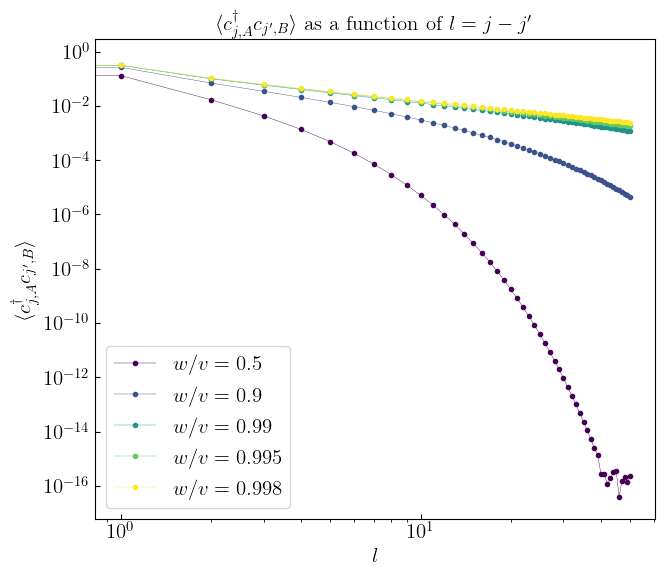

In [249]:
plot_correlation_data_as_distance_increase_loglogy()

In [231]:
def comparison_data_entropy_vs_var_quench():

    fig = plt.figure(figsize = (6,5))
    spec = gridspec.GridSpec(ncols = 1, nrows = 1)
    ax1 = fig.add_subplot(spec[0,0])
    ax2 = ax1.twinx()
    ax1.set_title(r"$S$ vs $\Delta N_{A}$ in the finite system, quench $t=0$", fontsize=20)

    direction1 = data_quench_dir/"entropy_200_cells_noflux.txt"
    direction2 = data_quench_dir/"variance_200_cells_noflux.txt"
    Entr = np.loadtxt(direction1)
    Var = np.loadtxt(direction2)

    #time = np.arange(0,108.57, 0.01)

    ax1.tick_params(direction = "in", labelsize = 15)
    ax2.tick_params(direction = "in", labelsize = 15)
    ax2.plot(Var, color = "blue")
    ax1.plot(Entr, color = "red")

    ax1.set_ylabel(r"$S(t)$", fontsize = 20, color = "red")
    ax2.set_ylabel(r"$\Delta N_{A}(t)$", fontsize = 20, color = "blue")
    ax1.set_xlabel(r"$t/\hbar$", fontsize = 20)

    ax1.text(60,1, r"$N = 400,\,\, N_{A} = 200$", fontsize = 15)
    ax1.text(60, 8, r"$v_{i} = 1, w_{i} = 0.7 \quad v_{f} = 0.7, w_{f} = 1$", fontsize = 15)

    #ax1.set_ylim([0,1])
    #ax2.set_ylim([0,0.01])
    #ax1.set_xlim([0,100])

    fig.savefig(plot_dir/"entropy_vs_variance_bigsize.pdf", bbox_inches = 'tight')
    

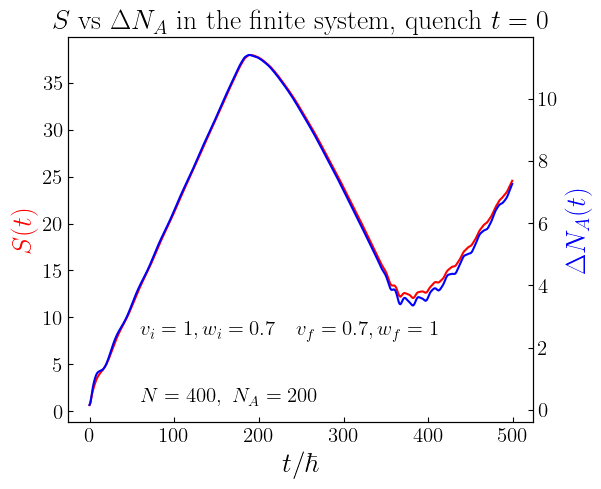

In [232]:
comparison_data_entropy_vs_var_quench()

In [233]:
def comparison_data_entropy_vs_var_quench_1():

    fig = plt.figure(figsize = (6,5))
    spec = gridspec.GridSpec(ncols = 1, nrows = 1)
    ax1 = fig.add_subplot(spec[0,0])
    ax2 = ax1.twinx()
    ax1.set_title(r"$S$ vs $\Delta N_{A}$ in the finite system, quench $t=0$", fontsize=20)

    direction1 = data_quench_dir/"entropy_40_cells_noflux.txt"
    direction2 = data_quench_dir/"variance_40_cells_noflux.txt"
    Entr = np.loadtxt(direction1)
    Var = np.loadtxt(direction2)

    ax1.tick_params(direction = "in", labelsize = 15)
    ax2.tick_params(direction = "in", labelsize = 15)
    ax2.plot(Var, color = "blue")
    ax1.plot(Entr, color = "red")

    ax1.set_ylabel(r"$S(t)$", fontsize = 20, color = "red")
    ax2.set_ylabel(r"$\Delta N_{A}(t)$", fontsize = 20, color = "blue")
    ax1.set_xlabel(r"$t/\hbar$", fontsize = 20)

    ax1.text(60,1, r"$N = 80,\,\, N_{A} = 40$", fontsize = 15)
    ax1.text(60, 8, r"$v_{i} = 1, w_{i} = 0.7 \quad v_{f} = 0.7, w_{f} = 1$", fontsize = 15)

    #ax1.set_ylim([0,1])
    #ax2.set_ylim([0,0.01])
    #ax1.set_xlim([0,100])

    fig.savefig(plot_dir/"entropy_vs_variance_midsize.pdf", bbox_inches = 'tight')
    

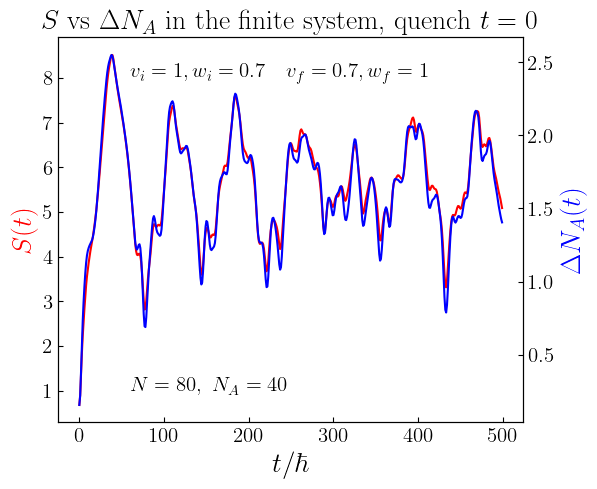

In [234]:
comparison_data_entropy_vs_var_quench_1()

In [235]:
def comparison_data_entropy_vs_var_quench_flux():

    fig = plt.figure(figsize = (6,5))
    spec = gridspec.GridSpec(ncols = 1, nrows = 1)
    ax1 = fig.add_subplot(spec[0,0])
    ax2 = ax1.twinx()
    ax1.set_title(r"$S$ vs $\Delta N_{A}$ in the finite system with flux, quench $t=0$", fontsize=20)
    direction1 = data_quench_dir/"entropy_40_cells_with_flux.txt"
    direction2 = data_quench_dir/"variance_40_cells_with_flux.txt"
    Entr = np.loadtxt(direction1)
    Var = np.loadtxt(direction2)

    #time = np.arange(0,108.57, 0.01)

    ax1.tick_params(direction = "in", labelsize = 15)
    ax2.tick_params(direction = "in", labelsize = 15)
    ax2.plot(Var, color = "blue")
    ax1.plot(Entr, color = "red")

    ax1.set_ylabel(r"$S(t)$", fontsize = 20, color = "red")
    ax2.set_ylabel(r"$\Delta N_{A}(t)$", fontsize = 20, color = "blue")
    ax1.set_xlabel(r"$t/\hbar$", fontsize = 20)

    ax1.text(60,1, r"$N = 80,\,\, N_{A} = 40, \phi \sim 0.0098 $", fontsize = 15)
    ax1.text(60, 8, r"$v_{i} = 1, w_{i} = 0.7 \quad v_{f} = 0.7, w_{f} = 1$", fontsize = 15)

    #ax1.set_ylim([0,1])
    #ax2.set_ylim([0,0.01])
    #ax1.set_xlim([0,100])

    fig.savefig(plot_dir/"entropy_vs_variance_with_flux_midsize.pdf", bbox_inches = 'tight')

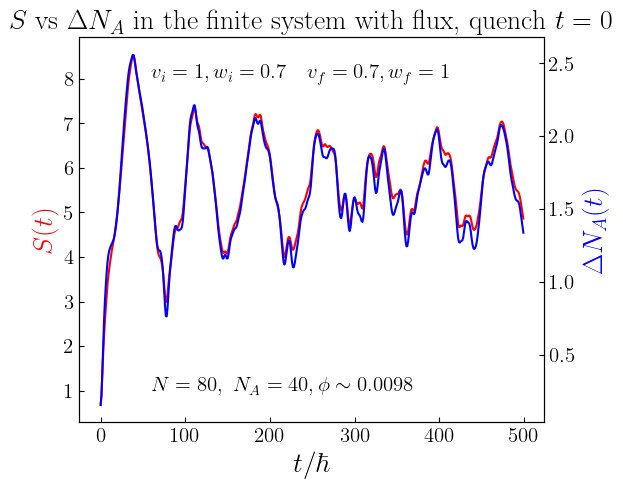

In [236]:
comparison_data_entropy_vs_var_quench_flux()